In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import numpy
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def collate_fn(data):
    pics = []
    target = []
    for item in data:

        pics.append(numpy.array(item[0]))
        target.append(item[1])
    return {
        'data': torch.from_numpy(numpy.array(pics)).float() / 255,
        'target': torch.from_numpy(numpy.array(target)),
    }

In [3]:
trainset = datasets.MNIST('.', download=True, train=True)
testset = datasets.MNIST('.', download=True, train=False)

train_dataloader = DataLoader(trainset, batch_size=256, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(testset, batch_size=256, shuffle=False, collate_fn=collate_fn)

In [7]:
#hyper params
num_epoches = 20
cuda_device = -1
device = f'cuda:{cuda_device}' if cuda_device != -1 else 'cpu'

## **Автоэнкодер**

In [5]:

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3, padding=1),
                                     nn.MaxPool2d((2,2)),
                                     nn.ReLU(),
                                     nn.Conv2d(32, 4, kernel_size=3, padding=1),
                                     nn.MaxPool2d((2,2)),
                                     nn.ReLU())
        
        self.decoder = nn.Sequential(nn.Conv2d(4, 16, kernel_size=3, padding=1),
                                     nn.UpsamplingNearest2d(scale_factor=2),
                                     nn.ReLU(),
                                     nn.Conv2d(16, 32, kernel_size=3, padding=1),
                                     nn.UpsamplingNearest2d(scale_factor=2),
                                     nn.ReLU(),
                                     nn.Conv2d(32, 1, kernel_size=5, padding=2),
                                     nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [9]:
model = AutoEncoder()
model.to(device)
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()
data_loaders = {'train' : train_dataloader, 'test' : test_dataloader}

In [10]:
for epoch in range(num_epoches):
  for k, loader in data_loaders.items():
    for batch in tqdm(loader):
      X_batch = batch['data'].to(device).unsqueeze(1)
      if k == 'train':
        model.train()
        optim.zero_grad()
        pred = model(X_batch)
        loss = loss_func(pred, X_batch)
        loss.backward()
        optim.step()
      else:
        model.eval()
        with torch.no_grad():
          pred = model(X_batch)
          loss = loss_func(pred, X_batch)
    print(f'Эпоха {epoch+1}, {k}: loss = {loss.item()}')

100%|██████████| 235/235 [01:40<00:00,  2.34it/s]


Эпоха 1, train: loss = 0.01110661868005991


100%|██████████| 40/40 [00:08<00:00,  4.94it/s]


Эпоха 1, test: loss = 0.010557758621871471


100%|██████████| 235/235 [01:39<00:00,  2.36it/s]


Эпоха 2, train: loss = 0.009614303708076477


100%|██████████| 40/40 [00:08<00:00,  4.93it/s]


Эпоха 2, test: loss = 0.008813303895294666


100%|██████████| 235/235 [01:39<00:00,  2.37it/s]


Эпоха 3, train: loss = 0.007499470375478268


100%|██████████| 40/40 [00:07<00:00,  5.13it/s]


Эпоха 3, test: loss = 0.0077051944099366665


100%|██████████| 235/235 [01:36<00:00,  2.43it/s]


Эпоха 4, train: loss = 0.006514670792967081


100%|██████████| 40/40 [00:07<00:00,  5.21it/s]


Эпоха 4, test: loss = 0.007057860027998686


100%|██████████| 235/235 [01:36<00:00,  2.45it/s]


Эпоха 5, train: loss = 0.006264945026487112


100%|██████████| 40/40 [00:07<00:00,  5.03it/s]


Эпоха 5, test: loss = 0.006575719453394413


100%|██████████| 235/235 [01:37<00:00,  2.40it/s]


Эпоха 6, train: loss = 0.0063974373042583466


100%|██████████| 40/40 [00:08<00:00,  4.91it/s]


Эпоха 6, test: loss = 0.0067582386545836926


100%|██████████| 235/235 [01:40<00:00,  2.35it/s]


Эпоха 7, train: loss = 0.005501036532223225


100%|██████████| 40/40 [00:08<00:00,  4.90it/s]


Эпоха 7, test: loss = 0.005792002193629742


100%|██████████| 235/235 [01:40<00:00,  2.34it/s]


Эпоха 8, train: loss = 0.005607211496680975


100%|██████████| 40/40 [00:08<00:00,  4.93it/s]


Эпоха 8, test: loss = 0.00551073532551527


100%|██████████| 235/235 [01:39<00:00,  2.36it/s]


Эпоха 9, train: loss = 0.005360059905797243


100%|██████████| 40/40 [00:08<00:00,  4.93it/s]


Эпоха 9, test: loss = 0.005378628149628639


100%|██████████| 235/235 [01:39<00:00,  2.36it/s]


Эпоха 10, train: loss = 0.00539142731577158


100%|██████████| 40/40 [00:08<00:00,  4.90it/s]


Эпоха 10, test: loss = 0.005076591856777668


100%|██████████| 235/235 [01:39<00:00,  2.37it/s]


Эпоха 11, train: loss = 0.005156667437404394


100%|██████████| 40/40 [00:07<00:00,  5.13it/s]


Эпоха 11, test: loss = 0.004952939692884684


100%|██████████| 235/235 [01:35<00:00,  2.47it/s]


Эпоха 12, train: loss = 0.004547363147139549


100%|██████████| 40/40 [00:07<00:00,  5.10it/s]


Эпоха 12, test: loss = 0.004724185913801193


100%|██████████| 235/235 [01:36<00:00,  2.43it/s]


Эпоха 13, train: loss = 0.004478756338357925


100%|██████████| 40/40 [00:08<00:00,  4.90it/s]


Эпоха 13, test: loss = 0.004617531318217516


100%|██████████| 235/235 [01:39<00:00,  2.36it/s]


Эпоха 14, train: loss = 0.004958285018801689


100%|██████████| 40/40 [00:08<00:00,  4.93it/s]


Эпоха 14, test: loss = 0.004753235261887312


100%|██████████| 235/235 [01:39<00:00,  2.36it/s]


Эпоха 15, train: loss = 0.004385842941701412


100%|██████████| 40/40 [00:08<00:00,  4.87it/s]


Эпоха 15, test: loss = 0.004398645367473364


100%|██████████| 235/235 [01:39<00:00,  2.37it/s]


Эпоха 16, train: loss = 0.004135118331760168


100%|██████████| 40/40 [00:08<00:00,  4.92it/s]


Эпоха 16, test: loss = 0.004341682884842157


100%|██████████| 235/235 [01:39<00:00,  2.37it/s]


Эпоха 17, train: loss = 0.0045386673882603645


100%|██████████| 40/40 [00:08<00:00,  4.92it/s]


Эпоха 17, test: loss = 0.004254789557307959


100%|██████████| 235/235 [01:39<00:00,  2.36it/s]


Эпоха 18, train: loss = 0.004763823933899403


100%|██████████| 40/40 [00:08<00:00,  4.91it/s]


Эпоха 18, test: loss = 0.004228392615914345


100%|██████████| 235/235 [01:37<00:00,  2.42it/s]


Эпоха 19, train: loss = 0.004426189232617617


100%|██████████| 40/40 [00:07<00:00,  5.11it/s]


Эпоха 19, test: loss = 0.004136639181524515


100%|██████████| 235/235 [01:35<00:00,  2.47it/s]


Эпоха 20, train: loss = 0.0044144922867417336


100%|██████████| 40/40 [00:07<00:00,  5.10it/s]

Эпоха 20, test: loss = 0.0041398415341973305


In [12]:
test = testset.data[1000].unsqueeze(0).unsqueeze(0).float() / 255
predict = model(test.to(device))

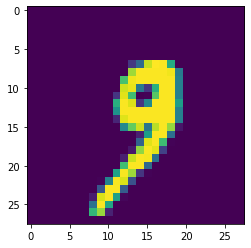

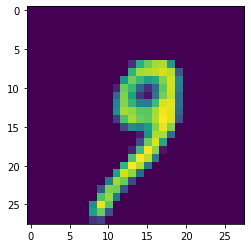

In [13]:
plt.imshow(test[0].view(28, 28).detach().numpy())
plt.show()

plt.imshow(predict[0][0].cpu().detach().numpy())
plt.show()

# **Вариационный автоэнкодер**

In [14]:
def sampling(mu, sigma):
    return mu + sigma * torch.normal(torch.zeros_like(mu), torch.ones_like(mu))

In [15]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(sigma))
    return torch.distributions.kl_divergence(p,q).mean()

In [16]:
class VAE(nn.Module):
    def __init__(self):
        super().__init__()     

        self.encoder = nn.Sequential(nn.Conv2d(1, 16, kernel_size=5, padding=2),
                                     nn.MaxPool2d((2,2)),
                                     nn.ReLU(),
                                     nn.Conv2d(16, 16, kernel_size=3, padding=1),
                                     nn.MaxPool2d((2,2)),
                                     nn.Conv2d(16, 1, kernel_size=3, padding=1))
        
        self.decoder = nn.Sequential(nn.ConvTranspose2d(1, 16, kernel_size=5, padding=2),
                                     nn.UpsamplingNearest2d(scale_factor=2),
                                     nn.ReLU(),
                                     nn.ConvTranspose2d(16, 16, kernel_size=3, padding=1),
                                     nn.UpsamplingNearest2d(scale_factor=2),
                                     nn.ReLU(),
                                     nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1),
                                     nn.ReLU())
        
    def forward(self, x):
        activation = nn.ReLU()
        mu, sigma = activation(self.encoder(x)), torch.exp(self.encoder(x))
        x = self.decoder(sampling(mu, sigma))
        return x, mu, sigma

In [17]:
model = VAE()
model.to(device)
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()

In [18]:
loaders = {"train": train_dataloader, "valid": test_dataloader}

In [19]:
for epoch in range(num_epoches):
  for k, loader in data_loaders.items():
    for batch in tqdm(loader):
      X_batch = batch['data'].to(device).unsqueeze(1)
      if k == 'train':
        model.train()
        optim.zero_grad()
        pred, mu, sigma = model(X_batch)
        loss = kl_loss(mu, sigma) + loss_func(pred, X_batch)
        loss.backward()
        optim.step()
      else:
        model.eval()
        with torch.no_grad():
          pred, mu, sigma = model(X_batch)
          loss = kl_loss(mu, sigma) + loss_func(pred, X_batch)
    print(f'Эпоха {epoch+1}, {k}: loss = {loss.item()}')

100%|██████████| 235/235 [01:32<00:00,  2.55it/s]


Эпоха 1, train: loss = 0.07405230402946472


100%|██████████| 40/40 [00:06<00:00,  6.17it/s]


Эпоха 1, test: loss = 0.08084123581647873


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 2, train: loss = 0.06914512813091278


100%|██████████| 40/40 [00:06<00:00,  6.29it/s]


Эпоха 2, test: loss = 0.07703979313373566


100%|██████████| 235/235 [01:31<00:00,  2.57it/s]


Эпоха 3, train: loss = 0.06985596567392349


100%|██████████| 40/40 [00:06<00:00,  6.16it/s]


Эпоха 3, test: loss = 0.07693441212177277


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 4, train: loss = 0.06636317074298859


100%|██████████| 40/40 [00:06<00:00,  6.31it/s]


Эпоха 4, test: loss = 0.07564612478017807


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 5, train: loss = 0.07057291269302368


100%|██████████| 40/40 [00:06<00:00,  6.36it/s]


Эпоха 5, test: loss = 0.07652830332517624


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 6, train: loss = 0.06731322407722473


100%|██████████| 40/40 [00:06<00:00,  6.27it/s]


Эпоха 6, test: loss = 0.0763319656252861


100%|██████████| 235/235 [01:31<00:00,  2.57it/s]


Эпоха 7, train: loss = 0.06783538311719894


100%|██████████| 40/40 [00:06<00:00,  6.33it/s]


Эпоха 7, test: loss = 0.07577401399612427


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 8, train: loss = 0.06809160858392715


100%|██████████| 40/40 [00:06<00:00,  6.31it/s]


Эпоха 8, test: loss = 0.0765080377459526


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 9, train: loss = 0.06916593015193939


100%|██████████| 40/40 [00:06<00:00,  6.25it/s]


Эпоха 9, test: loss = 0.07680769264698029


100%|██████████| 235/235 [01:31<00:00,  2.57it/s]


Эпоха 10, train: loss = 0.06643310934305191


100%|██████████| 40/40 [00:06<00:00,  6.24it/s]


Эпоха 10, test: loss = 0.07495548576116562


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 11, train: loss = 0.0654120147228241


100%|██████████| 40/40 [00:06<00:00,  6.32it/s]


Эпоха 11, test: loss = 0.07604080438613892


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 12, train: loss = 0.06834813207387924


100%|██████████| 40/40 [00:06<00:00,  6.32it/s]


Эпоха 12, test: loss = 0.07473437488079071


100%|██████████| 235/235 [01:31<00:00,  2.57it/s]


Эпоха 13, train: loss = 0.07025504112243652


100%|██████████| 40/40 [00:06<00:00,  6.28it/s]


Эпоха 13, test: loss = 0.07642257958650589


100%|██████████| 235/235 [01:30<00:00,  2.59it/s]


Эпоха 14, train: loss = 0.06859767436981201


100%|██████████| 40/40 [00:06<00:00,  6.27it/s]


Эпоха 14, test: loss = 0.07479400932788849


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 15, train: loss = 0.06767673045396805


100%|██████████| 40/40 [00:06<00:00,  6.31it/s]


Эпоха 15, test: loss = 0.07514920830726624


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 16, train: loss = 0.06717362254858017


100%|██████████| 40/40 [00:06<00:00,  6.30it/s]


Эпоха 16, test: loss = 0.07624523341655731


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 17, train: loss = 0.06767258048057556


100%|██████████| 40/40 [00:06<00:00,  6.24it/s]


Эпоха 17, test: loss = 0.0760197639465332


100%|██████████| 235/235 [01:32<00:00,  2.55it/s]


Эпоха 18, train: loss = 0.06985104084014893


100%|██████████| 40/40 [00:06<00:00,  6.21it/s]


Эпоха 18, test: loss = 0.07603492587804794


100%|██████████| 235/235 [01:32<00:00,  2.55it/s]


Эпоха 19, train: loss = 0.06715312600135803


100%|██████████| 40/40 [00:06<00:00,  6.37it/s]


Эпоха 19, test: loss = 0.0758216381072998


100%|██████████| 235/235 [01:31<00:00,  2.56it/s]


Эпоха 20, train: loss = 0.06863883882761002


100%|██████████| 40/40 [00:06<00:00,  6.22it/s]

Эпоха 20, test: loss = 0.07565347105264664


In [20]:
test = testset.data[1000].unsqueeze(0).unsqueeze(0).float() / 255
predict, _, _ = model(test.to(device))

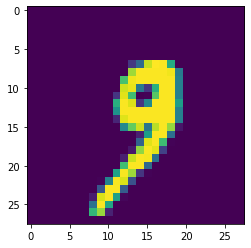

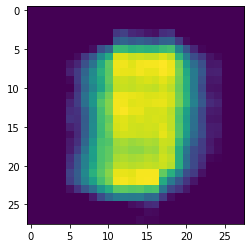

In [21]:
plt.imshow(test[0].view(28, 28).detach().numpy())
plt.show()

plt.imshow(predict[0][0].cpu().detach().numpy())
plt.show()